In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
market_data = pd.read_csv("../Ejercicios Alvaro/Mall_Customers.csv")

In [3]:
market_data.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
market_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
market_data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

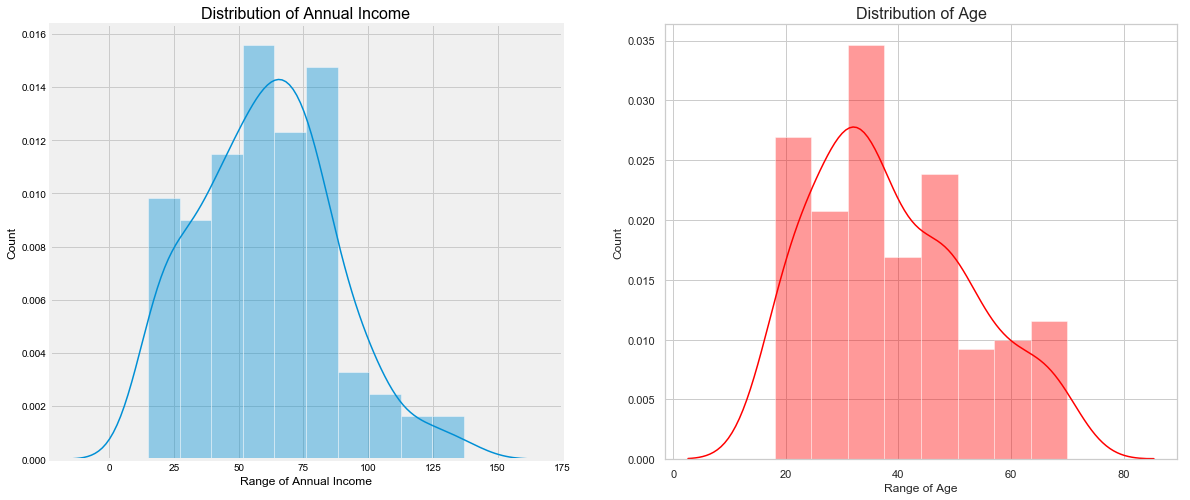

In [6]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(market_data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 16)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(market_data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 16)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

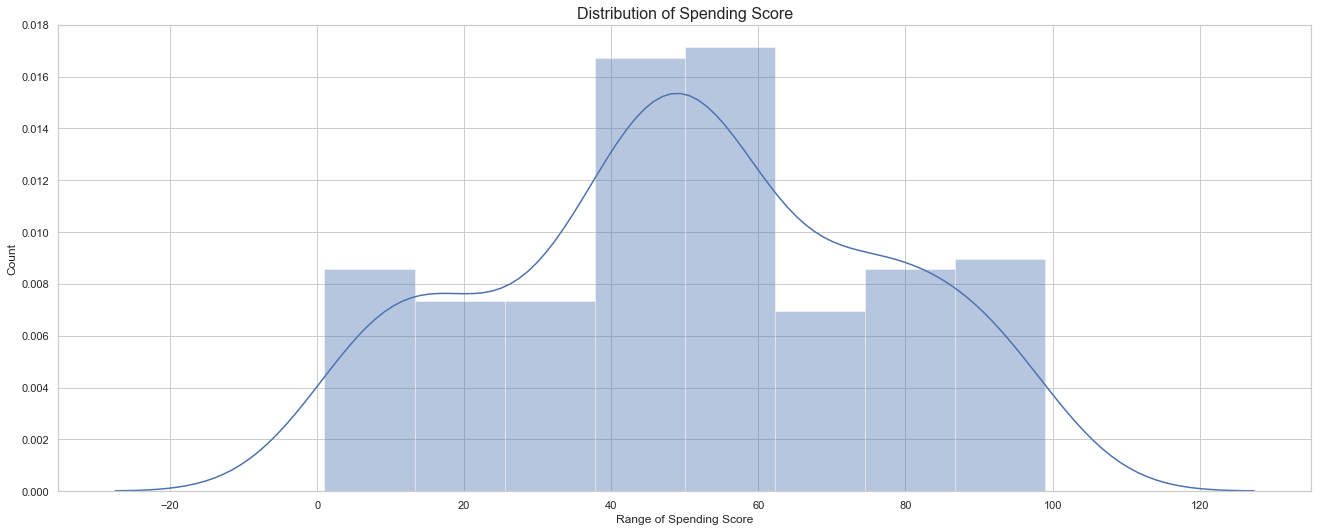

In [433]:
sns.set(style = 'whitegrid')
sns.distplot(market_data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score', fontsize = 16)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')

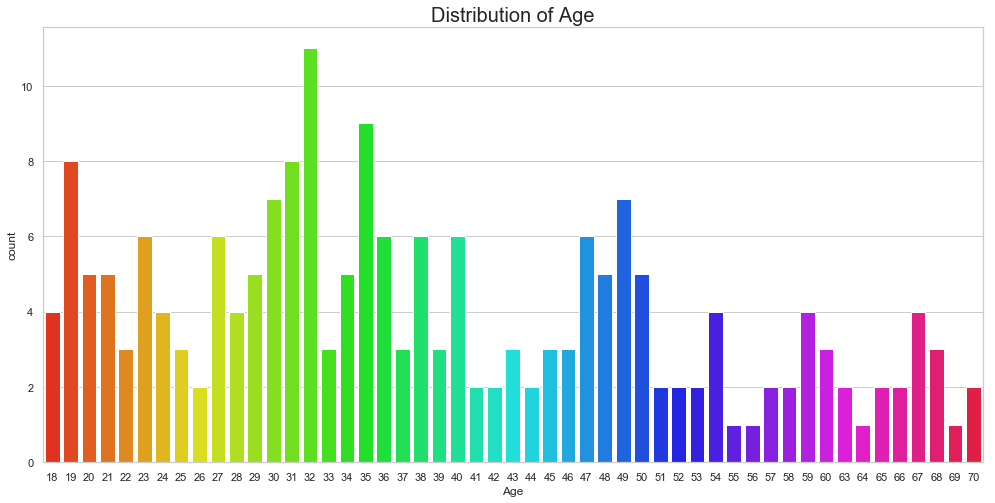

In [7]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(market_data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

    Annual Income
    
    - Very few people have an income exceeding 100k dollars
    - The average income of people is around 60k dollars
    - The most common income range is 60-80k dollars
    - The minimum income is around 20k dollars
    
    Age range
    
    -The average age of a customer is around 38 years old
    -The age range of a regular customer is around 30-38 years
    -The elderly (50 years and older) are not regular customers of the mall
    - Although people between 30-38 years are the most frequent visitors, there is also a good influx of young people between 20-25 years
    
    Spending Score
    
    - The average score is 50.2
    

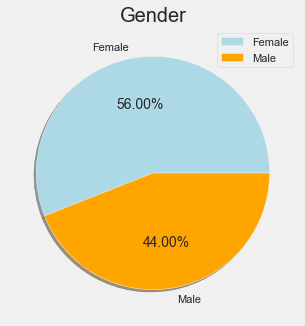

In [26]:
labels = ['Female', 'Male']
size = market_data['Gender'].value_counts()
colors = ['lightblue', 'orange']

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

    The number of women is greater than the number of men in the dataset
        Female 112
        Male 88
    
     As evidenced in the graph, there is a greater influx of female clients than men

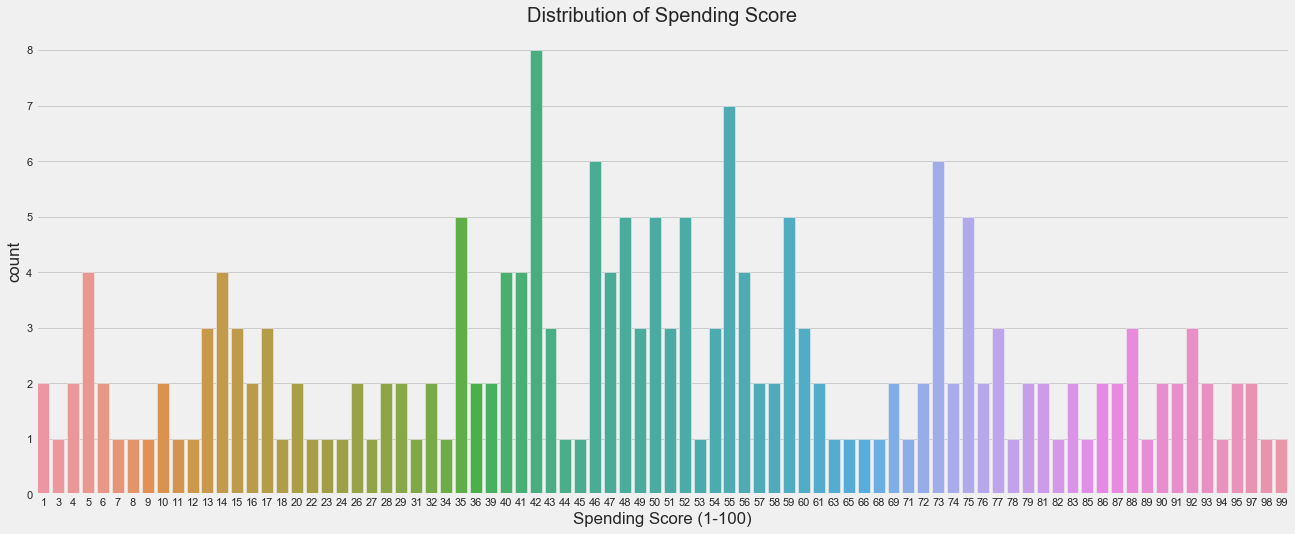

In [27]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(market_data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()


    -Most clients have their Spending Score in the range of [35-60]
    -The average Spending Score for buyers is 50 points
    - From the distribution of the information it is observed that there is only 1 person with a 99-point Spending Score

In [117]:
gender_dummies = pd.get_dummies(market_data['Gender'], prefix="Gender")
column_names = market_data.columns.values.tolist()
market_new = market_data[column_names].join(gender_dummies)
market_new.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


In [118]:
market_new = market_new.drop(["Gender"],axis=1) 

In [119]:
market_new.head()
market_global = market_new.iloc[:,1:]
market_new = market_new.iloc[:,1:5]

In [121]:
market_new.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


### Parameters Analysis regarding Spending Score

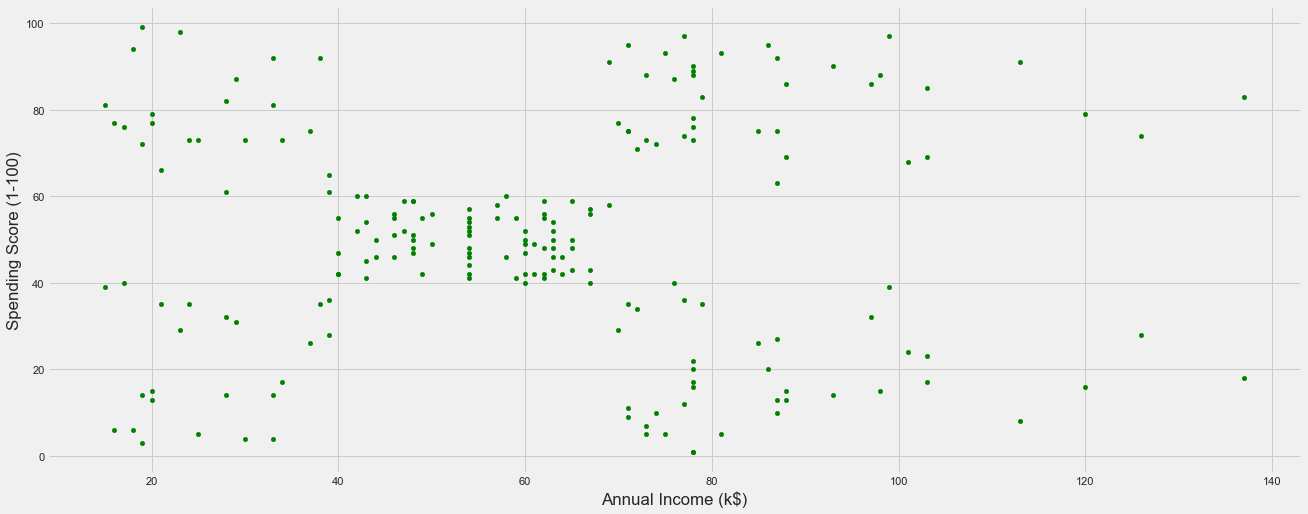

In [52]:
# Annual Income  vs Spending Score
market_new.plot(kind='scatter',x='Annual Income (k$)',y='Spending Score (1-100)',color='green')
plt.show() 

In [60]:
#Cluster Segmentation with params Annual income and Spending Score. 
x = market_new.iloc[:,[1,2]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [61]:
#Finding the optimal number of clusters using the Elbow Method
wcss=[]
for i in range (1,11): #Iteration from 1 to 11 until most optimal value for K is found
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

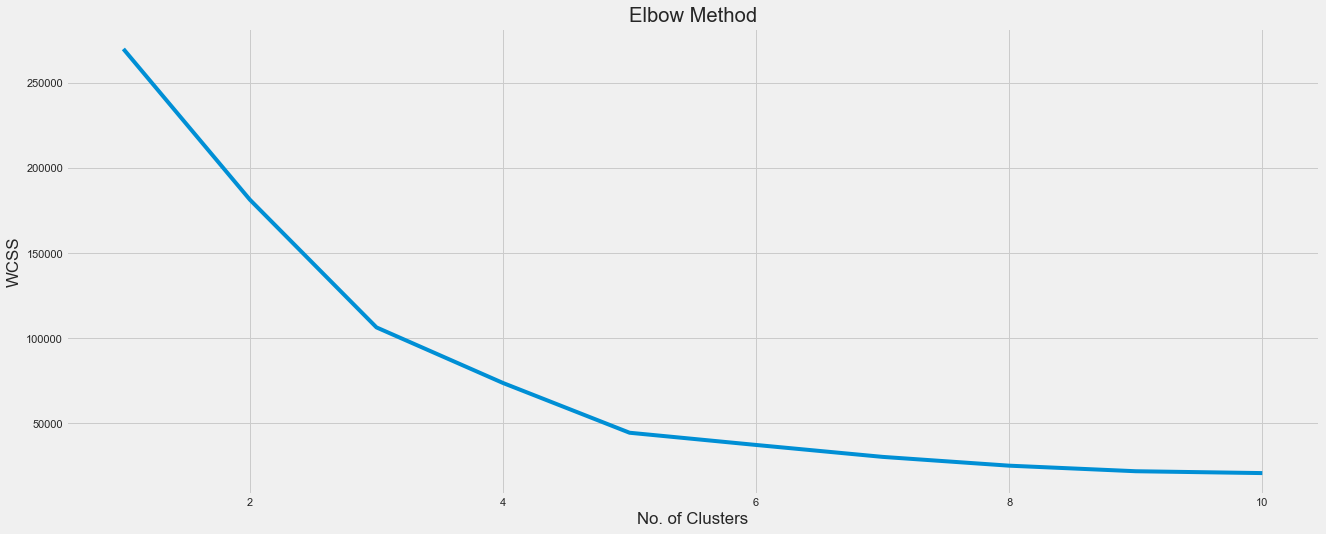

In [62]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

For the relationship between Annual Income and Spneding Score, it is found that the optimal number of clusters
it's 5

In [66]:
#Clustering K-means
kmeans=KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
x = np.array(x)

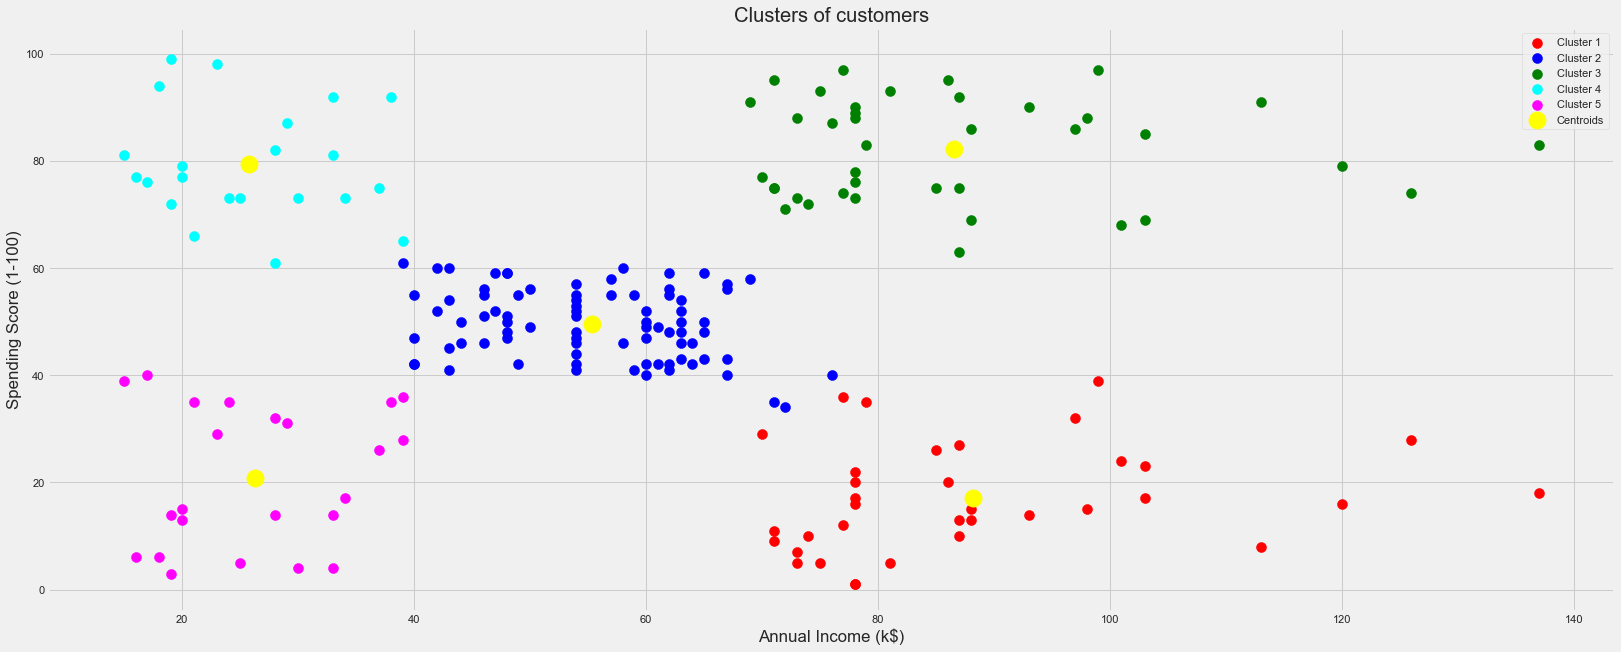

In [67]:
fig = plt.figure(figsize=(25, 10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

     5 observable groups arise for the Annual Income-Spending Score
        Cluster 1 (red) -> Customers with high Annual Income and relatively Low Spending Score
        Cluster 2 (Blue) -> Average customer with an annual Income close to the average and a Spending score within the average
        Cluster 3 (green) -> Customers more likely to make a purchase, with a high annual income and a high spending score (Target)
        Cluster 4 (blue) -> Clients with low annual income and high Spending Score
        Cluster 5 (pink) -> Customers with low Annual income and low Spending Score (unwanted)

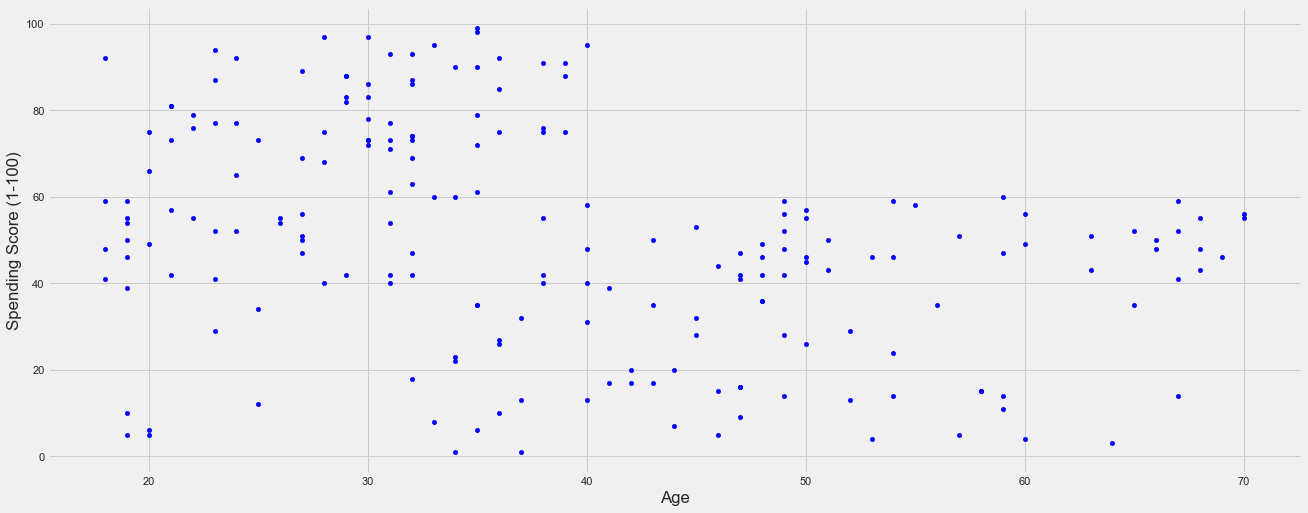

In [53]:
# Age vs Spending Score
market_new.plot(kind='scatter',x='Age',y='Spending Score (1-100)',color='blue')
plt.show()


In [76]:
#Segmentation based on Age vs Spending Score. 
x = market_new.iloc[:,[0,2]]
x.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [77]:
#Finding the optimal number of clusters using the Elbow Method
wcss=[]
for i in range (1,11): #Iteration from 1 to 11 until most optimal value for K is found
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

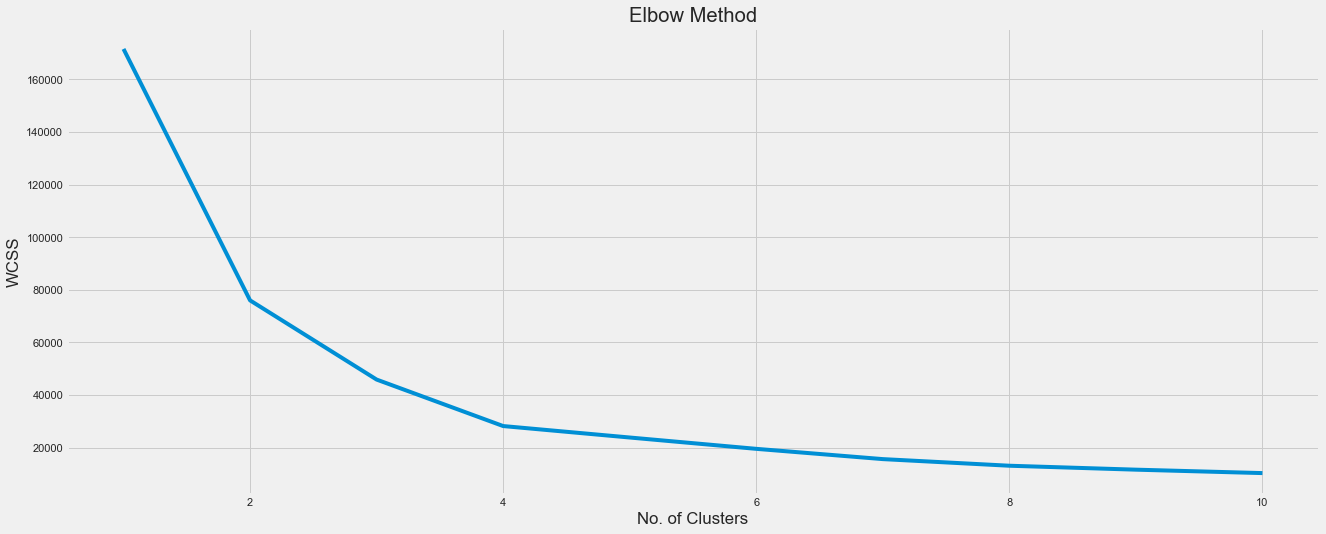

In [78]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


For the relationship between Age and Spending Score it is found that the optimal number of clusters
 is 4

In [79]:
#Clustering K-means
kmeans=KMeans(n_clusters=4,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
x = np.array(x)

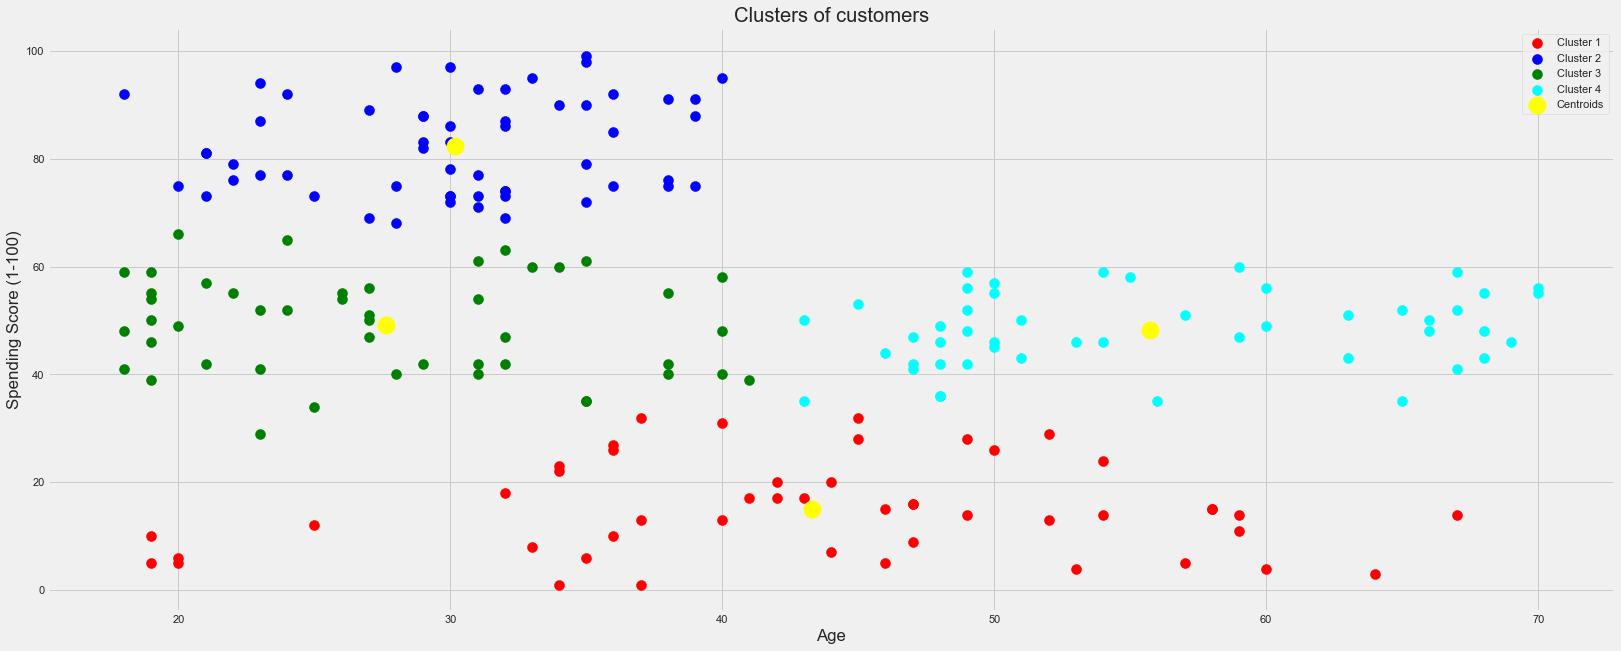

In [80]:
fig = plt.figure(figsize=(25, 10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

    Four observable groups for the Age-Spending Score relationship arise
 
        Cluster 1 (red) -> Clients with average age (30-60) and relatively low Spending Score
        Cluster 2 (Blue) -> Client with relatively low age (20-40) and high score
        Cluster 3 (green) -> Young customers with average score
        Cluster 4 (light blue) -> Older clients with an average score between (40-60)

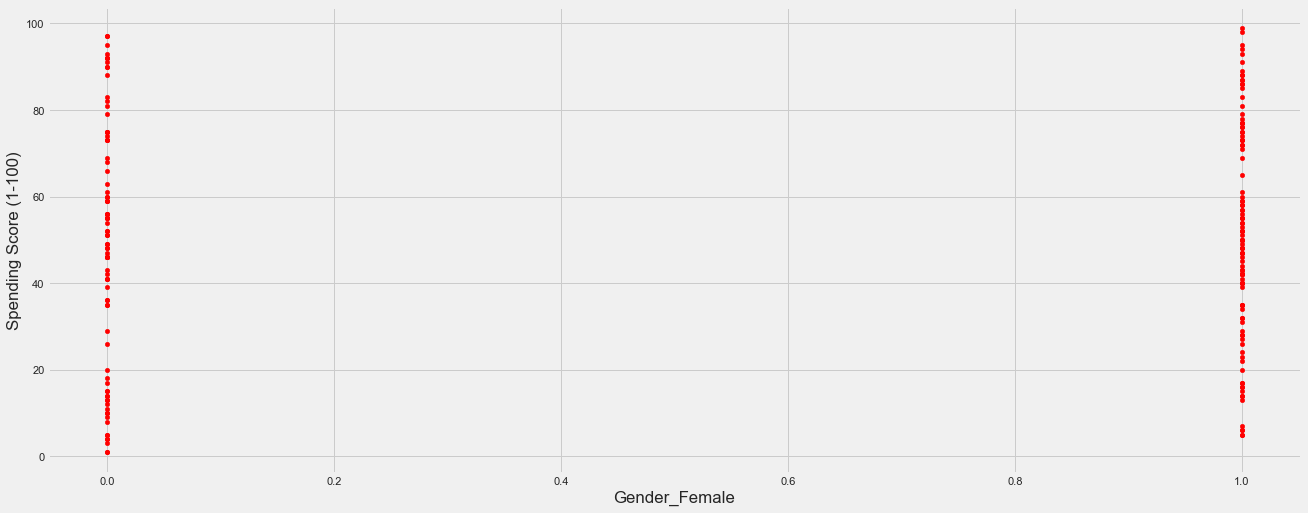

In [100]:
# Gender vs Spending Score
market_new.plot(kind='scatter',x='Gender_Female',y='Spending Score (1-100)',color='red')
plt.show()


In [101]:
#Segmentation based on Gender and Spending Score.  valid for both genders
x = market_new.iloc[:,[3,2]]
x.head()

,Gender_Female,Spending Score (1-100)
0,0,39
1,0,81
2,1,6
3,1,77
4,1,40


In [102]:
#Finding the optimal number of clusters using the Elbow Method
wcss=[]
for i in range (1,11): 
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

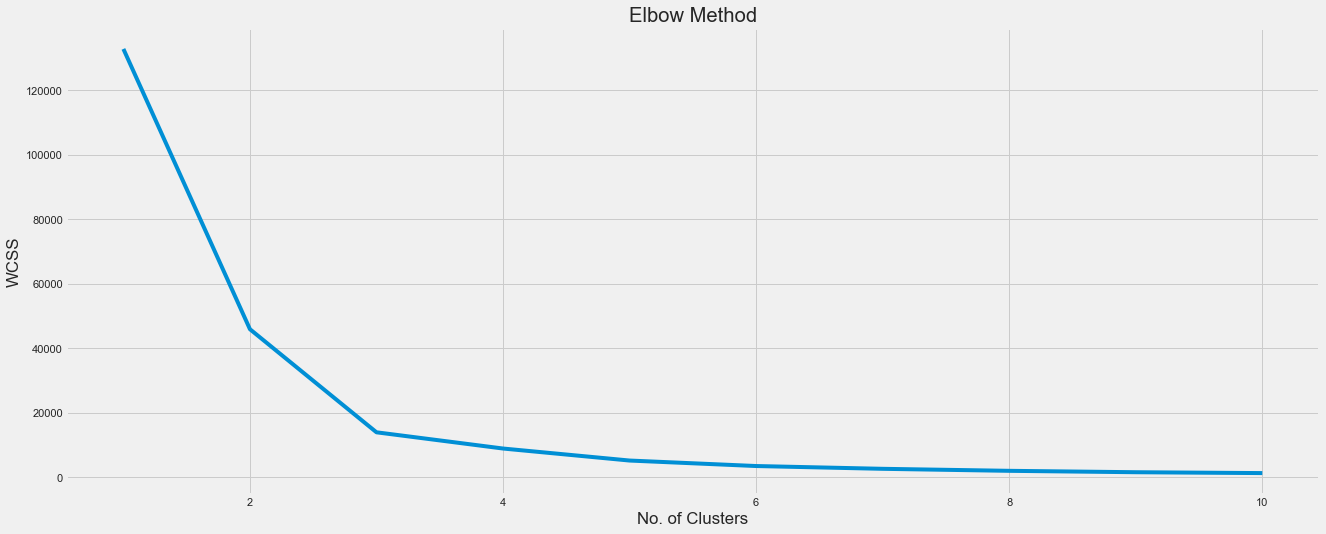

In [103]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

For the relationship between Gender_Female and Spending Score it is found that the optimal number of clusters
 is 3

In [104]:
#Clustering K-means
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)
x = np.array(x)

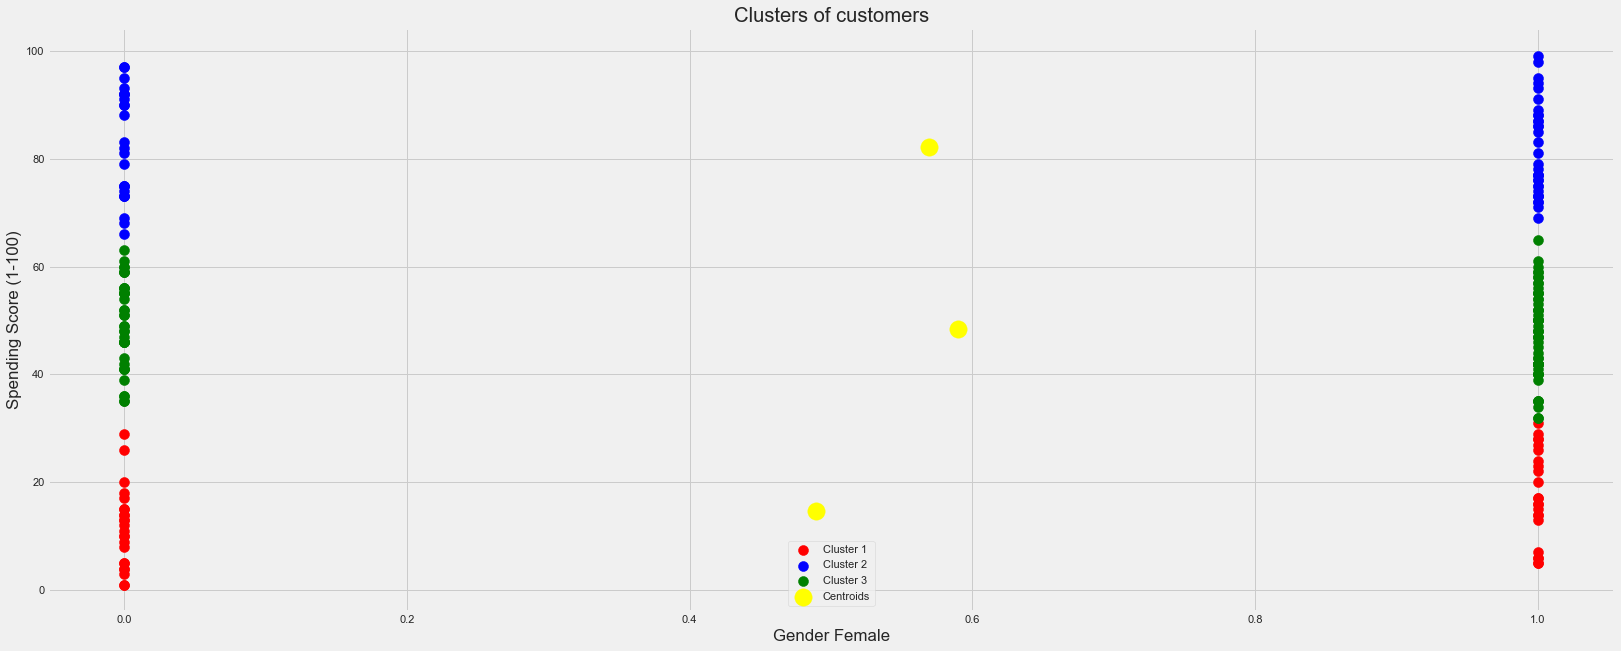

In [105]:
fig = plt.figure(figsize=(25, 10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Gender Female')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

    From the relationship of Gender with respect to the Spending Score, 3 groups are visible for each gender
         Masculine (0)
            Cluster 1 (red) -> Segment of men with a minimum spending score between 0 and 20
            Cluster 2 (blue) -> Segment of men with a high spending score between 60 and 99
            Cluster 3 (green) -> Segment of men with a moderate Spending score between 30 and 60
         Femenine (1)
            Cluster 1 (red) -> Segment of women with a minimum spending score between 0 and 30
            Cluster 2 (blue) -> Segment of women with a high spending score between 65 and 99
            Cluster 3 (green) -> Segment of women with a moderate spending score between 30 and 60

#### ANALYSIS AND SEGMENTATION WITH ALL PARAMETERS

In [122]:
# correlation matrix
market_global.corr(method='pearson')

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
Age,1.000000,-0.012398,-0.327227,-0.060867,0.060867
Annual Income (k$),-0.012398,1.000000,0.009903,-0.056410,0.056410
Spending Score (1-100),-0.327227,0.009903,1.000000,0.058109,-0.058109
Gender_Female,-0.060867,-0.056410,0.058109,1.000000,-1.000000
Gender_Male,0.060867,0.056410,-0.058109,-1.000000,1.000000


In [197]:
market_global.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


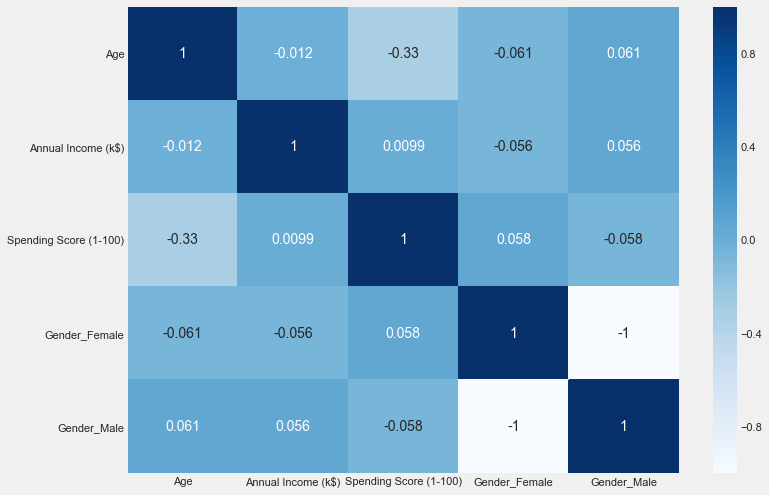

In [123]:
fig,ax = plt.subplots(figsize=(11,8))
sns.heatmap(market_global.corr(),annot=True,cmap="Blues" ,ax=ax)
plt.show()

   
   
    the values are not correlated with each other
       

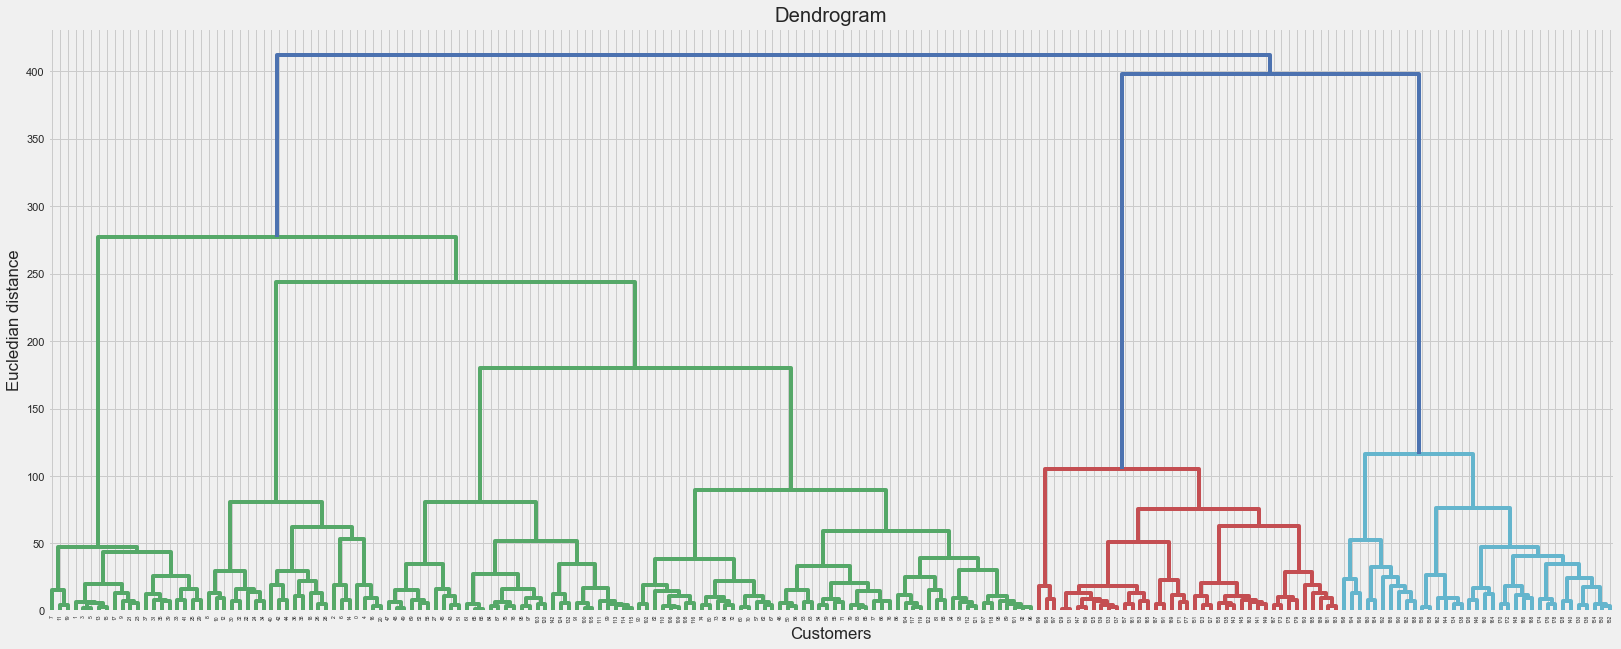

In [124]:
#finding cluster optimal number by dendrogram
fig = plt.figure(figsize=(25, 10))
dendrogram=dendrogram(linkage(market_global,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledian distance")
plt.show()

     Drawing an horizontal line for the greatest distance where there is no horizontal line between thems 3 groups are observed 

In [125]:
# Elbow Method
wcss=[]
for i in range (1,11): 
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(market_global)
    wcss.append(kmeans.inertia_)

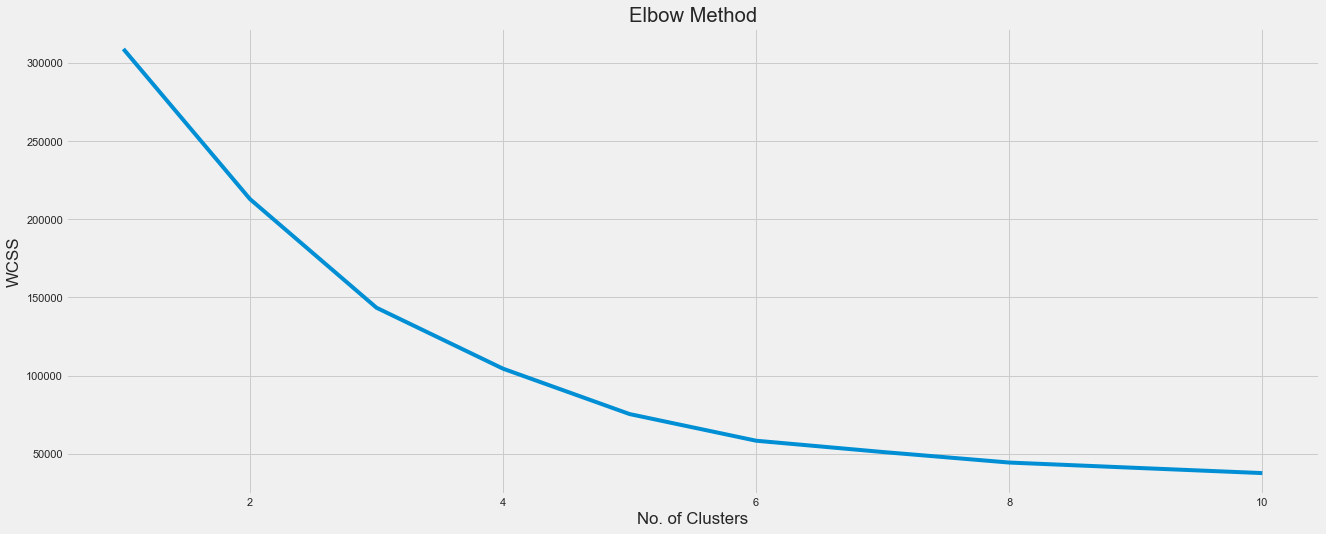

In [126]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [193]:
#Clustering K-means
kmeans=KMeans(n_clusters=3,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(market_global)

In [194]:
kmeans.cluster_centers_

array([[40.39473684, 87.        , 18.63157895,  0.47368421,  0.52631579],
       [32.69230769, 86.53846154, 82.12820513,  0.53846154,  0.46153846],
       [40.32520325, 44.15447154, 49.82926829,  0.59349593,  0.40650407]])

In [403]:
row = market_global.iloc[np.random.randint(0,200)]
row = [row]
row

[Age                       34
 Annual Income (k$)        58
 Spending Score (1-100)    60
 Gender_Female              1
 Gender_Male                0
 Name: 88, dtype: int64]

In [430]:
row= [[34,90,90,1,0]]
y_predict = kmeans.predict(row)
y_predict


array([1])

     From the analysis of values entered to the prediction, the 3 groups are determined as follows:
          Group 0 -> High Income, Low Score (Independent of age and gender)
          Group 1 -> High Income, High Score (Regardless of age and gender) -> High score greather than 70, High income> 61
          Group 2 -> Low Income (Regardless of age, gender and score)

Group 1 more likely to buy due to its high income and high score, regardless of gender and age